In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path_outcomes = "london-police-records/london-outcomes.csv"
path_stop = "london-police-records/london-stop-and-search.csv"
path_streets = "london-police-records/london-street.csv"

In [3]:
#streets is for crime type
streets = pd.read_csv(path_streets)
streets.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [4]:
streets.shape


(2946479, 12)

In [5]:
#stop is for police control
stop = pd.read_csv(path_stop, nrows=20)
stop.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

In [7]:
outcomes = pd.read_csv(path_outcomes, nrows=20)
outcomes.columns


Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Outcome type'],
      dtype='object')

In [8]:
streets.head(2)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified,NaN
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect,NaN


In [9]:
stop.head(2)

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False
1,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False


In [10]:
outcomes.head(2)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,b4adcc899360d595450a35cbe4d7d71d295bafefef98b2...,2014-06,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Suspect charged
1,64b14e3efdf9e12425e3ac19f5e72b6d19b5656523d91b...,2014-06,City of London Police,City of London Police,-0.088843,51.509532,On or near Parking Area,E01032739,City of London 001F,Investigation complete; no suspect identified


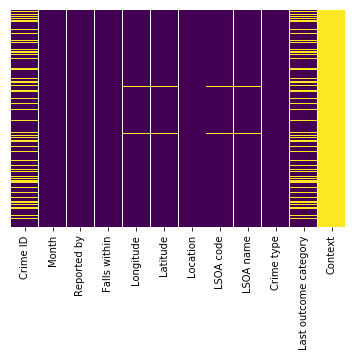

In [11]:
sns.heatmap(streets.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [12]:
streets = streets.drop(["Crime ID", "Context"],axis = 1)

In [13]:
streets.head(2)



,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified
1,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect


In [14]:
sns.set_style("whitegrid")

In [15]:
streets["Crime type"].unique()


array(['Vehicle crime', 'Violence and sexual offences',
       'Anti-social behaviour', 'Bicycle theft', 'Other theft',
       'Theft from the person', 'Other crime', 'Drugs', 'Burglary',
       'Public order', 'Shoplifting', 'Criminal damage and arson',
       'Robbery', 'Possession of weapons'], dtype=object)

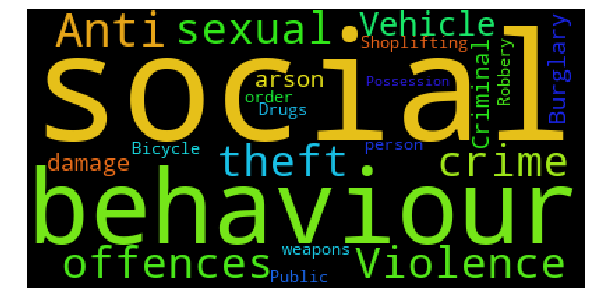

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(' '.join(streets["Crime type"]))

# Generate plot
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [17]:
print (streets["Month"].max())

2017-05


In [18]:
print (streets["Month"].min())

2014-06


In [19]:
streets["Reported by"].unique()

array(['City of London Police', 'Metropolitan Police Service'], dtype=object)

In [20]:
streets1 = streets[["Month","Longitude","Latitude","Location","Crime type","Last outcome category"]]

print(streets1.shape)

streets1.head(2)

(2946479, 6)


,Month,Longitude,Latitude,Location,Crime type,Last outcome category
0,2014-06,-0.113767,51.517372,On or near Stone Buildings,Vehicle crime,Investigation complete; no suspect identified
1,2014-06,-0.111497,51.518226,On or near Pedestrian Subway,Violence and sexual offences,Unable to prosecute suspect


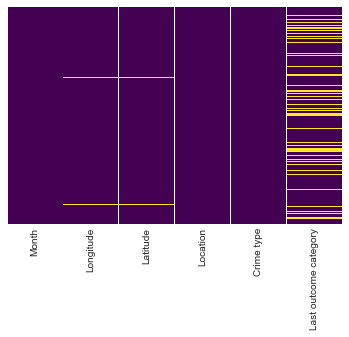

In [21]:
sns.heatmap(streets1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [22]:
streets2 = streets1.dropna(subset=["Longitude","Latitude"])
print(streets2.shape)

streets2.head(2)

(2911801, 6)


,Month,Longitude,Latitude,Location,Crime type,Last outcome category
0,2014-06,-0.113767,51.517372,On or near Stone Buildings,Vehicle crime,Investigation complete; no suspect identified
1,2014-06,-0.111497,51.518226,On or near Pedestrian Subway,Violence and sexual offences,Unable to prosecute suspect


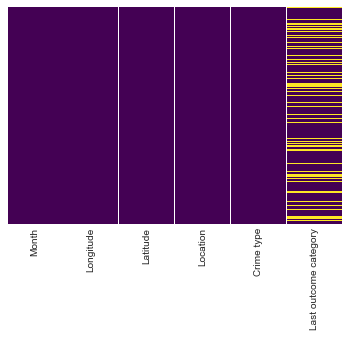

In [23]:
sns.heatmap(streets2.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [24]:
#sns.distplot(streets2["Month"],kde=False,bins=100)

In [25]:
streets2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2911801 entries, 0 to 2945451
Data columns (total 6 columns):
Month                    object
Longitude                float64
Latitude                 float64
Location                 object
Crime type               object
Last outcome category    object
dtypes: float64(2), object(4)
memory usage: 155.5+ MB


In [37]:
from datetime import datetime
#datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
streets2['Month'] =streets2['Month'].apply(lambda time : datetime.strptime(time,'%Y-%m'))


/home/aris/anaconda2/envs/Tensor/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [38]:
streets2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2911801 entries, 0 to 2945451
Data columns (total 6 columns):
Month                    datetime64[ns]
Longitude                float64
Latitude                 float64
Location                 object
Crime type               object
Last outcome category    object
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 235.5+ MB


/home/aris/anaconda2/envs/Tensor/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0,0,'Vehicle crime'),
 Text(0,0,'Violence and sexual offences'),
 Text(0,0,'Anti-social behaviour'),
 Text(0,0,'Bicycle theft'),
 Text(0,0,'Other theft'),
 Text(0,0,'Theft from the person'),
 Text(0,0,'Other crime'),
 Text(0,0,'Drugs'),
 Text(0,0,'Burglary'),
 Text(0,0,'Public order'),
 Text(0,0,'Shoplifting'),
 Text(0,0,'Criminal damage and arson'),
 Text(0,0,'Robbery'),
 Text(0,0,'Possession of weapons')]

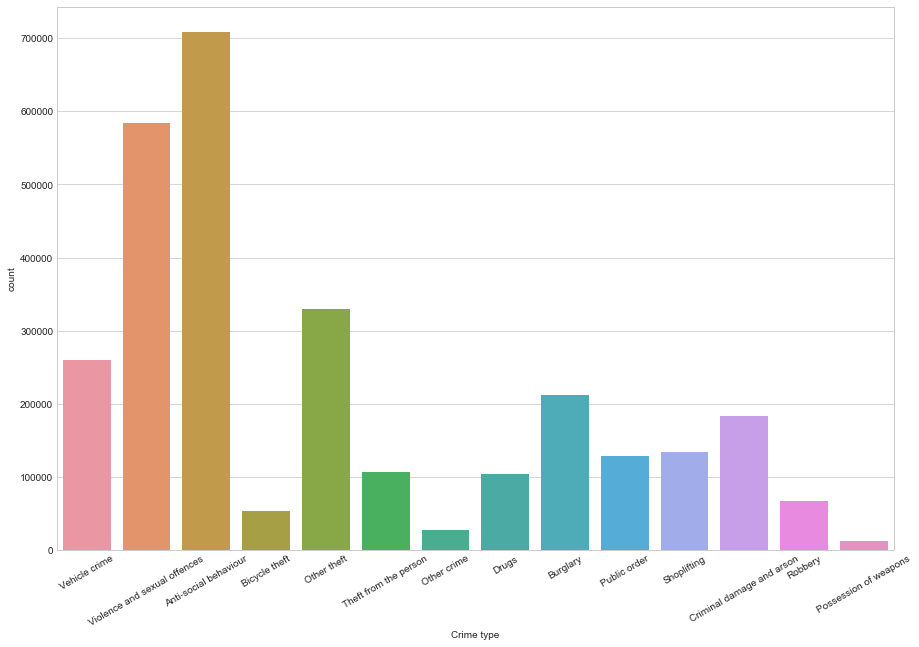

In [44]:
plt.figure(figsize=(15,10))
p = sns.countplot(x="Crime type", data = streets2)
p.set_xticklabels(p.get_xticklabels(),rotation=30)

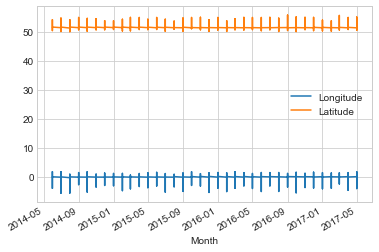

In [52]:
streets2.set_index('Month').plot()

In [55]:
streets3 = streets2.dropna()

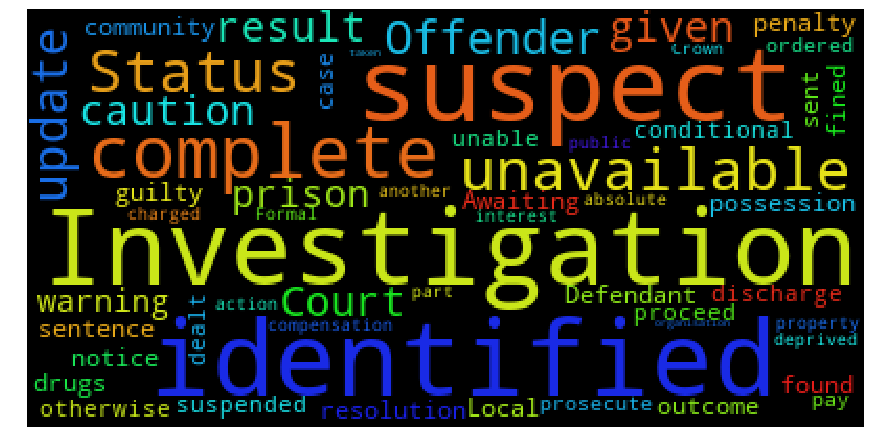

In [57]:
wordcloud = WordCloud().generate(' '.join(streets3["Last outcome category"]))

# Generate plot
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()